# Dates

Here we will analyze:
1. last_updated
2. date_created
3. stop_time
4. start_time

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from utils import *
X_dataframe = pd.read_csv("../data/X_dataframe.csv")

# Last updated

In [11]:
X_dataframe["last_updated"].describe()

count                        90000
unique                       86015
top       2015-09-30T12:20:39.000Z
freq                             6
Name: last_updated, dtype: object

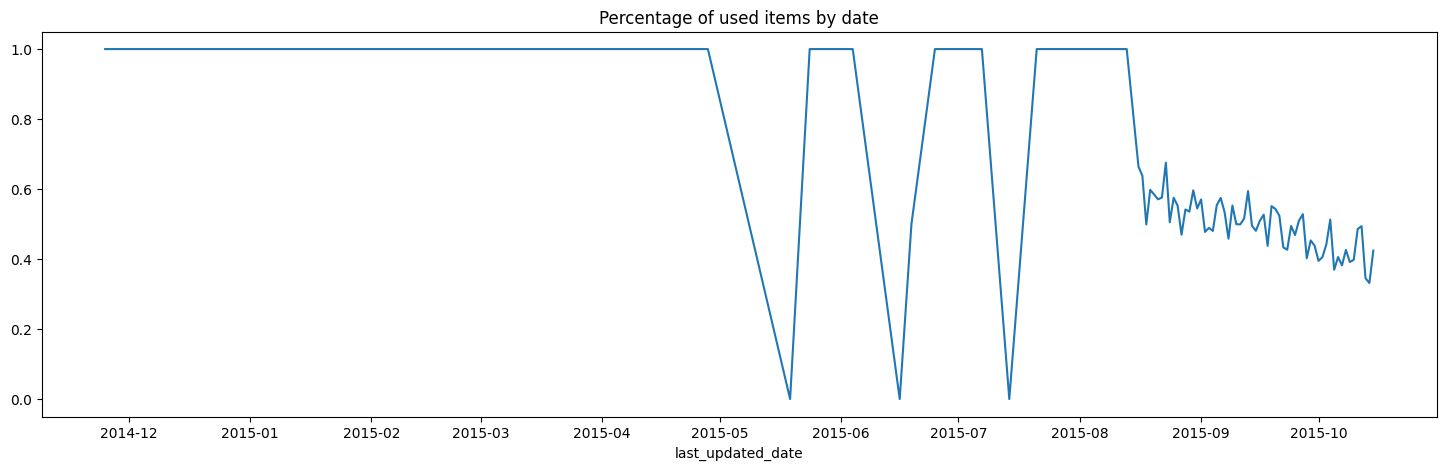

In [12]:
from datetime import date

# For each date of last updated, percentage of used items
# plot it like a time series
X_dataframe["last_updated"] = pd.to_datetime(X_dataframe["last_updated"])
X_dataframe["last_updated_date"] = X_dataframe["last_updated"].dt.date
plt.figure(figsize=(18, 5))
X_dataframe.groupby("last_updated_date")["used"].mean().plot(kind="line")
plt.title("Percentage of used items by date")
plt.show()

In [14]:
X_dataframe.groupby("last_updated_date")["used"].count()[22:32]

last_updated_date
2015-06-25      5
2015-07-03      1
2015-07-07      1
2015-07-14      1
2015-07-21      2
2015-08-03      1
2015-08-12      2
2015-08-13      2
2015-08-16    265
2015-08-17    594
Name: used, dtype: int64

#### 💡 Insight:
Before August 2015, all items in the dataset are labeled as **used**.  
Moreover, the daily counts before 2015-08-15 are very low (fewer than 5 items per day).  
The sudden increase afterward may reflect a **business or platform policy change**, rather than a natural trend in the data.

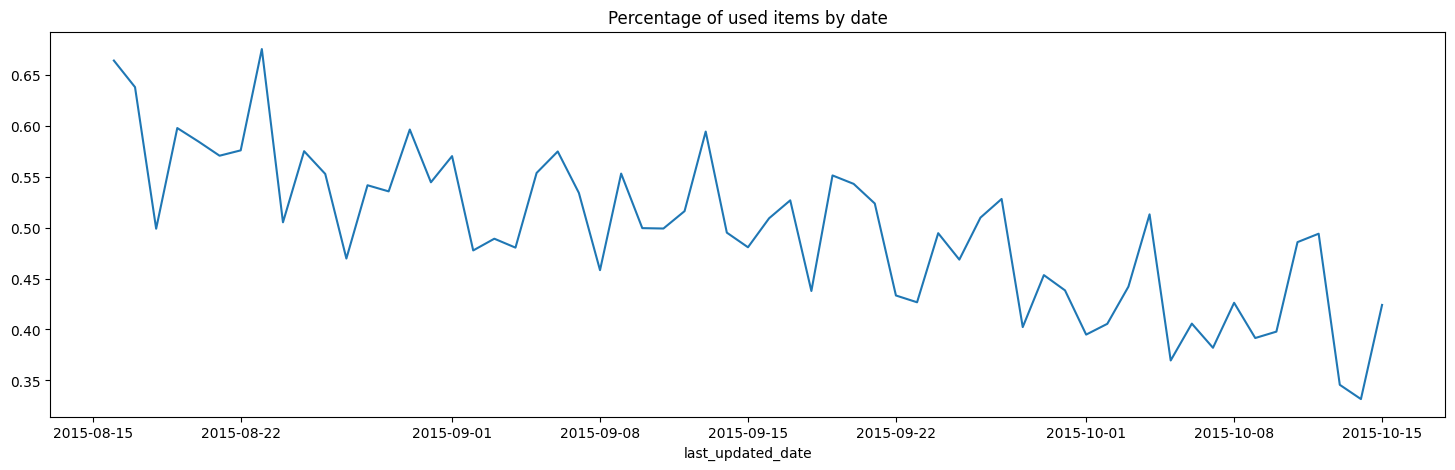

In [15]:
plt.figure(figsize=(18, 5))
# Plot the "used" mean after 2015-08-15
X_dataframe.loc[X_dataframe["last_updated_date"] > date(2015, 8, 15)].groupby(
    "last_updated_date"
)["used"].mean().plot(kind="line")
plt.title("Percentage of used items by date")
plt.show()

#### 💡 Insight:
There is a slight seasonality and a decreasing trend in the proportion of used items,  
but the time window is too short to treat this as a reliable feature for training.  

Moreover, the test data lies entirely after the training period (no temporal overlap),  
so seasonality or trend information from the future cannot be leveraged.  

For these reasons, the `last_updated_date` column will be removed from the training data.

# Date Created

In [16]:
X_dataframe["date_created"].describe()

count                        90000
unique                       79247
top       2015-09-03T20:22:05.000Z
freq                             7
Name: date_created, dtype: object

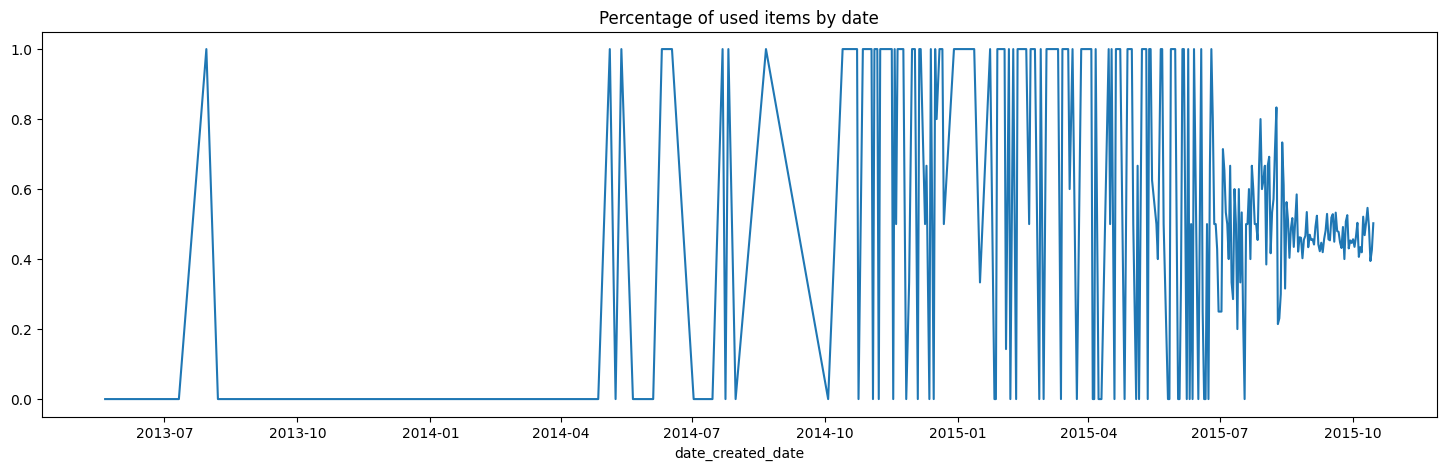

In [17]:
X_dataframe["date_created"] = pd.to_datetime(X_dataframe["date_created"])
X_dataframe["date_created_date"] = X_dataframe["date_created"].dt.date
plt.figure(figsize=(18, 5))
X_dataframe.groupby("date_created_date")["used"].mean().plot(kind="line")
plt.title("Percentage of used items by date")
plt.show()

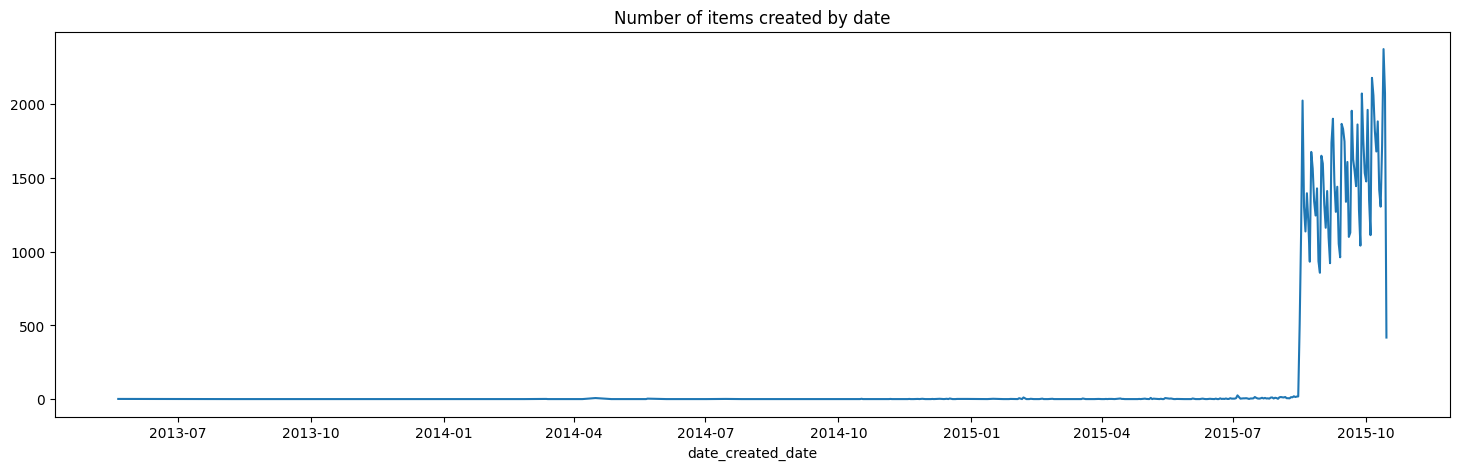

In [18]:
plt.figure(figsize=(18, 5))
X_dataframe["date_created_date"].value_counts().sort_index().plot(kind="line")
plt.title("Number of items created by date")
plt.show()


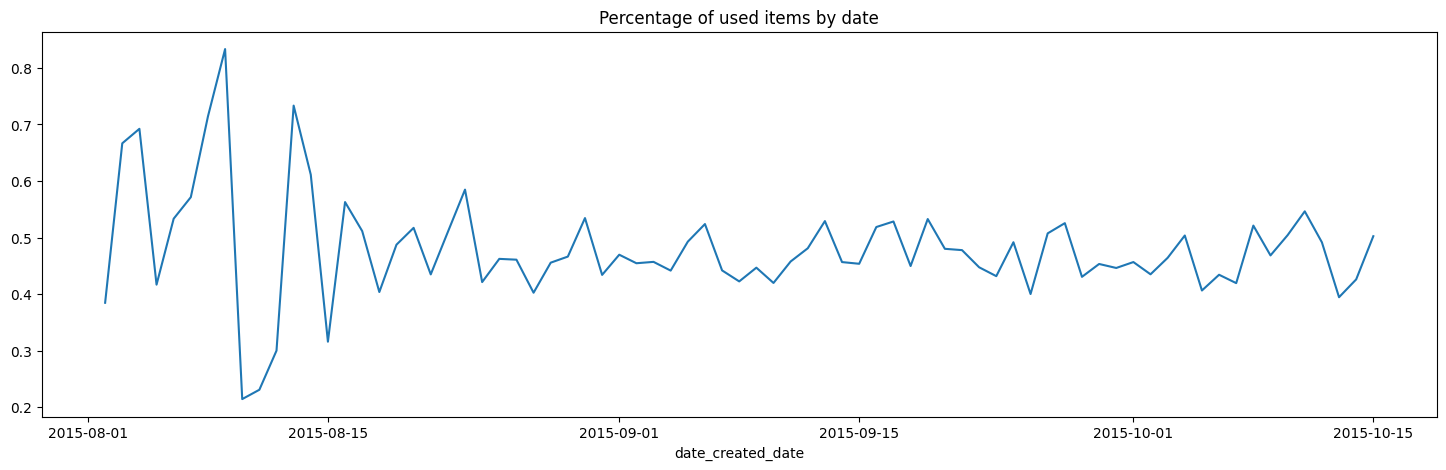

In [19]:
plt.figure(figsize=(18, 5))
X_dataframe.loc[X_dataframe["date_created_date"] > date(2015, 8, 1)].groupby(
    "date_created_date"
)["used"].mean().plot(kind="line")
plt.title("Percentage of used items by date")
plt.show()

#### 💡 Insight
The data was created mostly after august 2015. This is too short time period to do any analysis about it

# Stop Time and Start Time

In [20]:
X_dataframe["start_time"] = pd.to_datetime(X_dataframe["start_time"])
X_dataframe["stop_time"] = pd.to_datetime(X_dataframe["stop_time"])

X_dataframe["total_time"] = X_dataframe["stop_time"] - X_dataframe["start_time"]
X_dataframe["total_time"].describe()


count                        90000
mean     0 days 00:00:05.264851923
std      0 days 00:00:03.303954380
min      0 days 00:00:00.034460330
25%         0 days 00:00:05.184000
50%         0 days 00:00:05.184000
75%         0 days 00:00:05.184000
max         0 days 00:04:58.689302
Name: total_time, dtype: object

In [21]:
X_dataframe["total_time_seconds"] = X_dataframe["total_time"].dt.total_seconds()
X_dataframe["total_time_seconds"].describe()

count    90000.000000
mean         5.264852
std          3.303954
min          0.034460
25%          5.184000
50%          5.184000
75%          5.184000
max        298.689302
Name: total_time_seconds, dtype: float64

In [22]:
X_dataframe.loc[X_dataframe["used"] == 1]["total_time_seconds"].describe()

count    41648.000000
mean         5.219526
std          1.664555
min          0.034460
25%          5.184000
50%          5.184000
75%          5.184000
max         72.223791
Name: total_time_seconds, dtype: float64

In [23]:
X_dataframe.loc[X_dataframe["used"] == 0]["total_time_seconds"].describe()

count    48352.000000
mean         5.303893
std          4.234270
min          0.217067
25%          5.184000
50%          5.184000
75%          5.184000
max        298.689302
Name: total_time_seconds, dtype: float64

In [24]:
spearman_correlation = X_dataframe[["used", "total_time_seconds"]].corr(method="spearman")
pearson_correlation = X_dataframe[["used", "total_time_seconds"]].corr(method="pearson")
kendall_correlation = X_dataframe[["used", "total_time_seconds"]].corr(method="kendall")
print("Pearson correlation: ", pearson_correlation)
print("Spearman correlation: ", spearman_correlation)
print("Kendall correlation: ", kendall_correlation)


Pearson correlation:                          used  total_time_seconds
used                1.000000           -0.012732
total_time_seconds -0.012732            1.000000
Spearman correlation:                          used  total_time_seconds
used                1.000000            0.054235
total_time_seconds  0.054235            1.000000
Kendall correlation:                          used  total_time_seconds
used                1.000000            0.053496
total_time_seconds  0.053496            1.000000


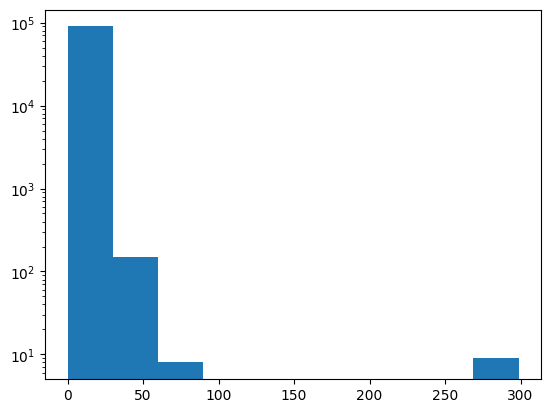

In [26]:
plt.hist(X_dataframe["total_time_seconds"])
plt.yscale("log")

plt.show()

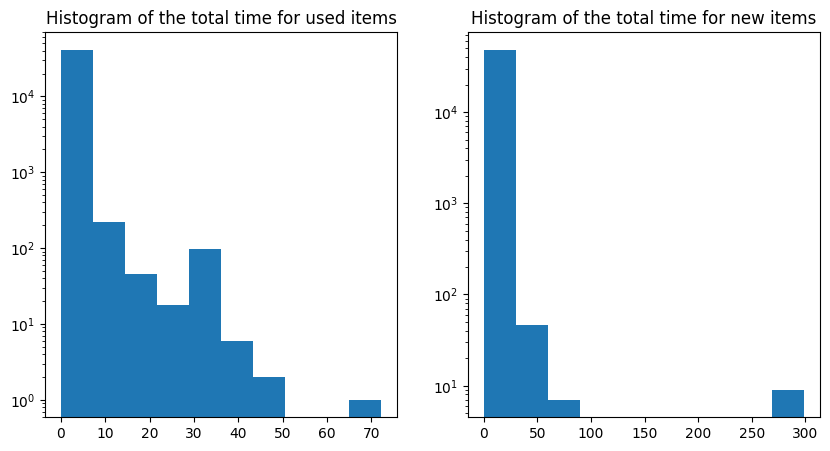

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(X_dataframe.loc[X_dataframe["used"] == 1]["total_time_seconds"])
ax[0].set_title("Histogram of the total time for used items")
ax[1].hist(X_dataframe.loc[X_dataframe["used"] == 0]["total_time_seconds"])
ax[1].set_title("Histogram of the total time for new items")
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.show()

#### 💡 Insights  
The distributions of total time differ between new and used items.  
Used items tend to cluster at shorter durations, while new items show a few extreme long-duration cases.  
This suggests the variable could provide useful signal for classification.